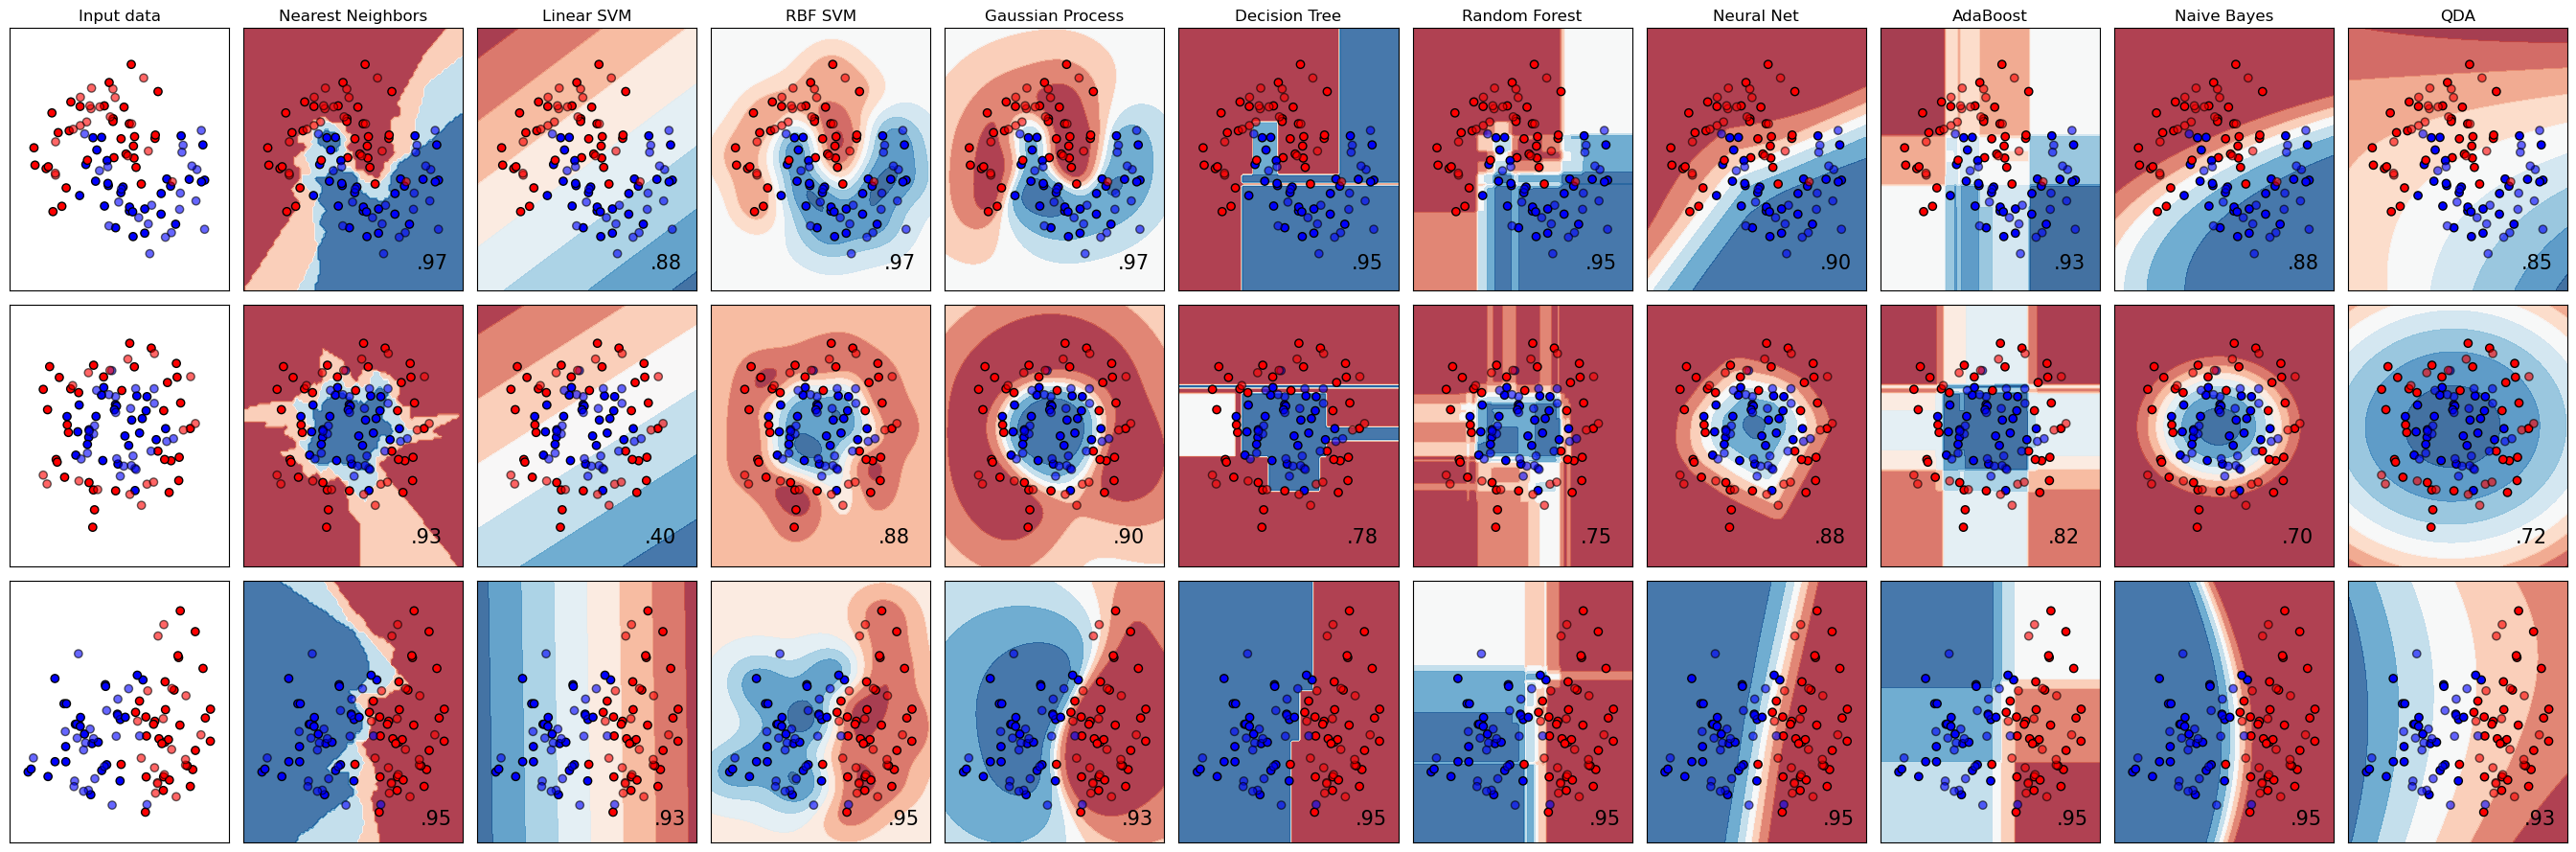

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [13]:
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file('data/example_data/training_data.shp')
gdf

,class,geometry
0,1,POINT Z (639288.644 5357863.910 0.000)
1,1,POINT Z (639248.923 5357830.874 0.000)
2,1,POINT Z (639357.355 5357834.871 0.000)
3,1,POINT Z (639390.446 5357851.380 0.000)
4,1,POINT Z (639385.042 5357887.316 0.000)
...,...,...
1448,1,POINT Z (642074.798 5356142.395 0.000)
1449,1,POINT Z (642888.198 5356268.682 0.000)
1450,1,POINT Z (642871.299 5356260.434 0.000)
1451,0,POINT Z (638114.273 5358251.924 0.000)


In [14]:
X = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).to_list()
y = gdf['class'].to_numpy() 

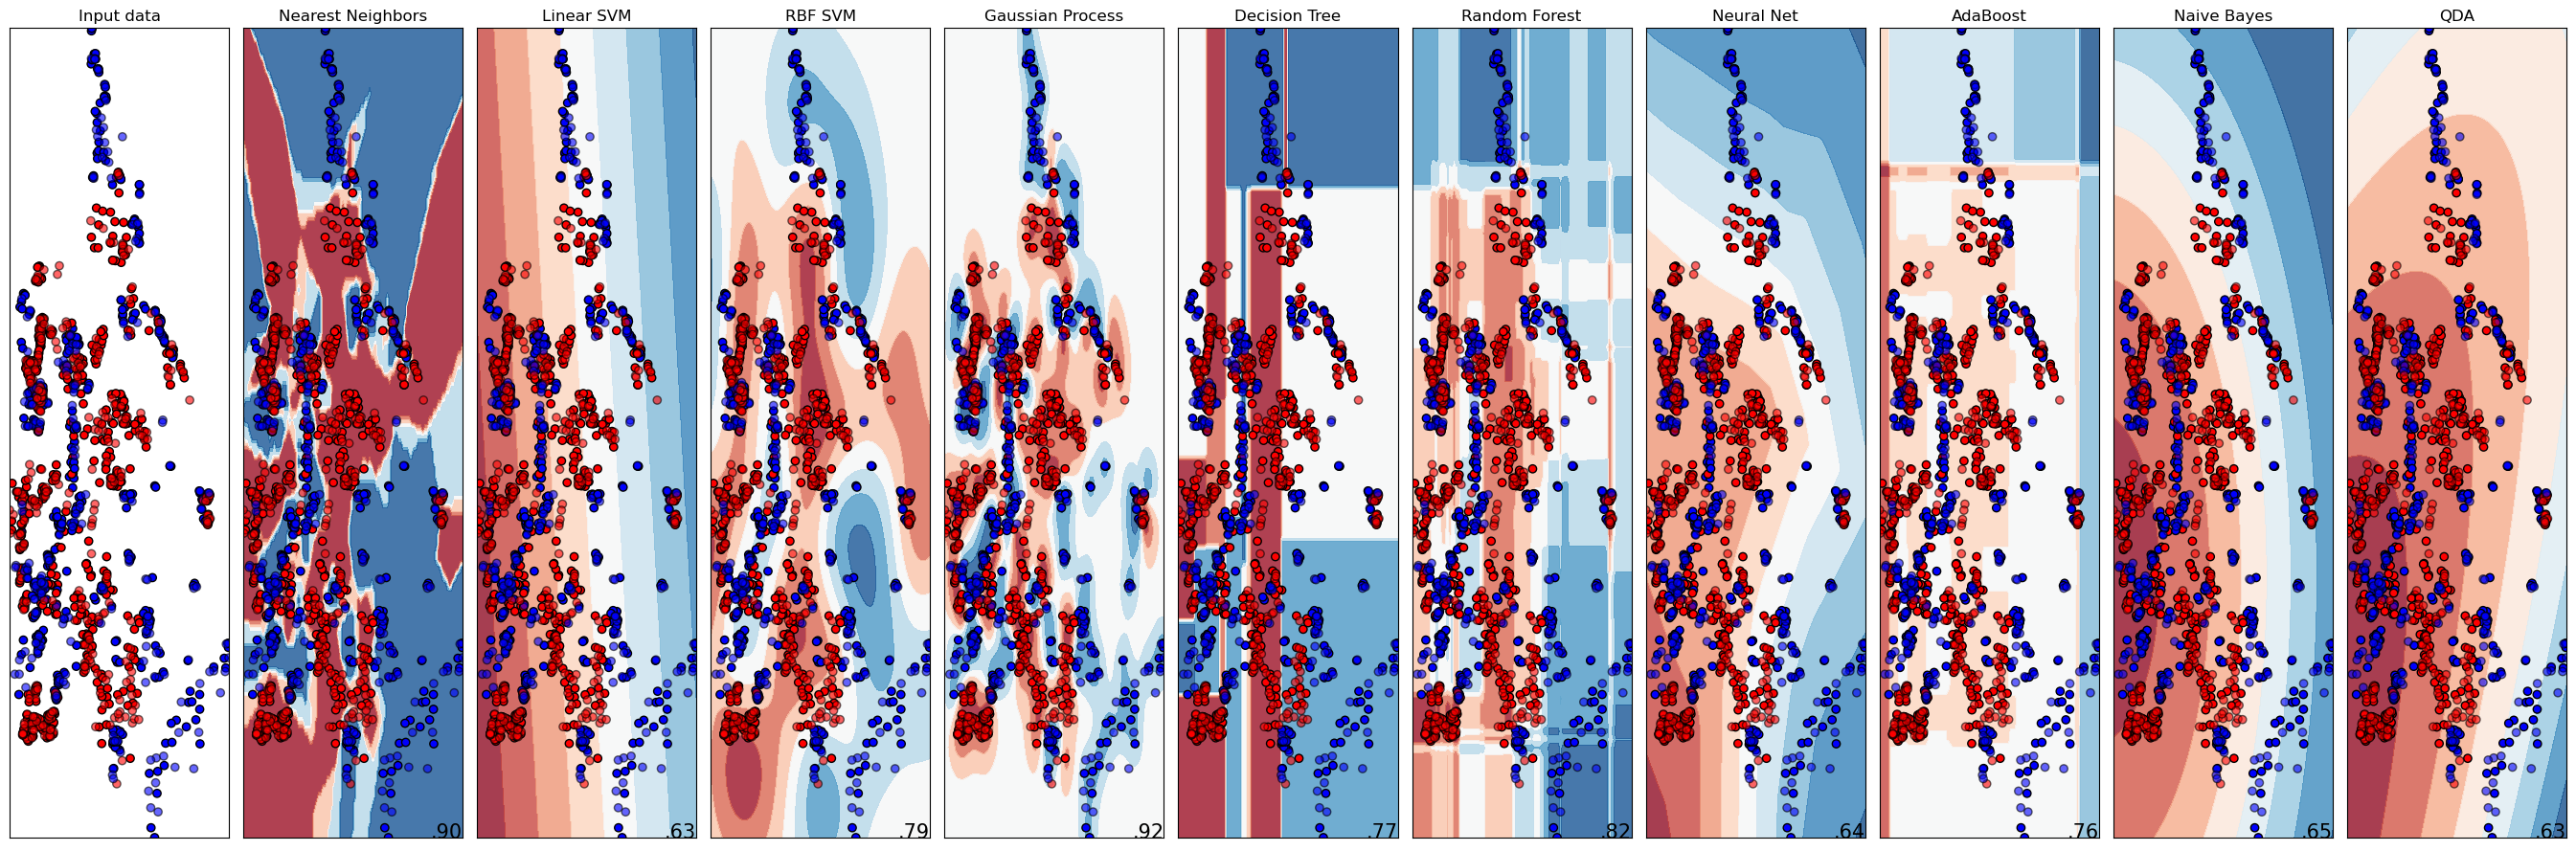

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


rng = np.random.RandomState(2)
linearly_separable = (X, y)

datasets = [(np.array(X), y)]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
        

    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.4)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

#plt.savefig('Images/point_models.png', format='png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [20]:
gdf_polygon = gpd.read_file('C:/Users/leoni/Documents/Uni/UGS/RandomForest/data_a/rcr/rcr_augsburg.shp')
gdf_polygon

,Id,Classname,classvalue,geometry
0,0,crop,3,"POLYGON ((636654.985 5363761.581, 636930.350 5..."
1,0,crop,3,"POLYGON ((636069.668 5363567.362, 636443.473 5..."
2,0,grass,2,"POLYGON ((637788.372 5363097.778, 637902.775 5..."
3,0,streets,5,"POLYGON ((638873.453 5363027.668, 638891.434 5..."
4,0,streets,5,"POLYGON ((637786.457 5361275.207, 637820.512 5..."
5,0,buildings,1,"POLYGON ((637706.428 5359867.891, 637815.403 5..."
6,0,buildings,1,"POLYGON ((637833.282 5361149.204, 637917.568 5..."
7,0,buildings,1,"POLYGON ((637169.213 5359466.895, 637227.958 5..."
8,0,paths,6,"POLYGON ((638210.439 5360188.858, 638225.764 5..."
9,0,paths,6,"POLYGON ((638178.087 5359959.839, 638195.966 5..."


In [21]:
gdf_polygon['area'] = gdf_polygon.geometry.area
gdf_polygon['perimeter'] = gdf_polygon.geometry.length
gdf_polygon['centroid_x'] = gdf_polygon.geometry.centroid.x
gdf_polygon['centroid_y'] = gdf_polygon.geometry.centroid.y

In [22]:
X = gdf_polygon[['area', 'perimeter', 'centroid_x', 'centroid_y']]
y = gdf_polygon['classvalue'] 

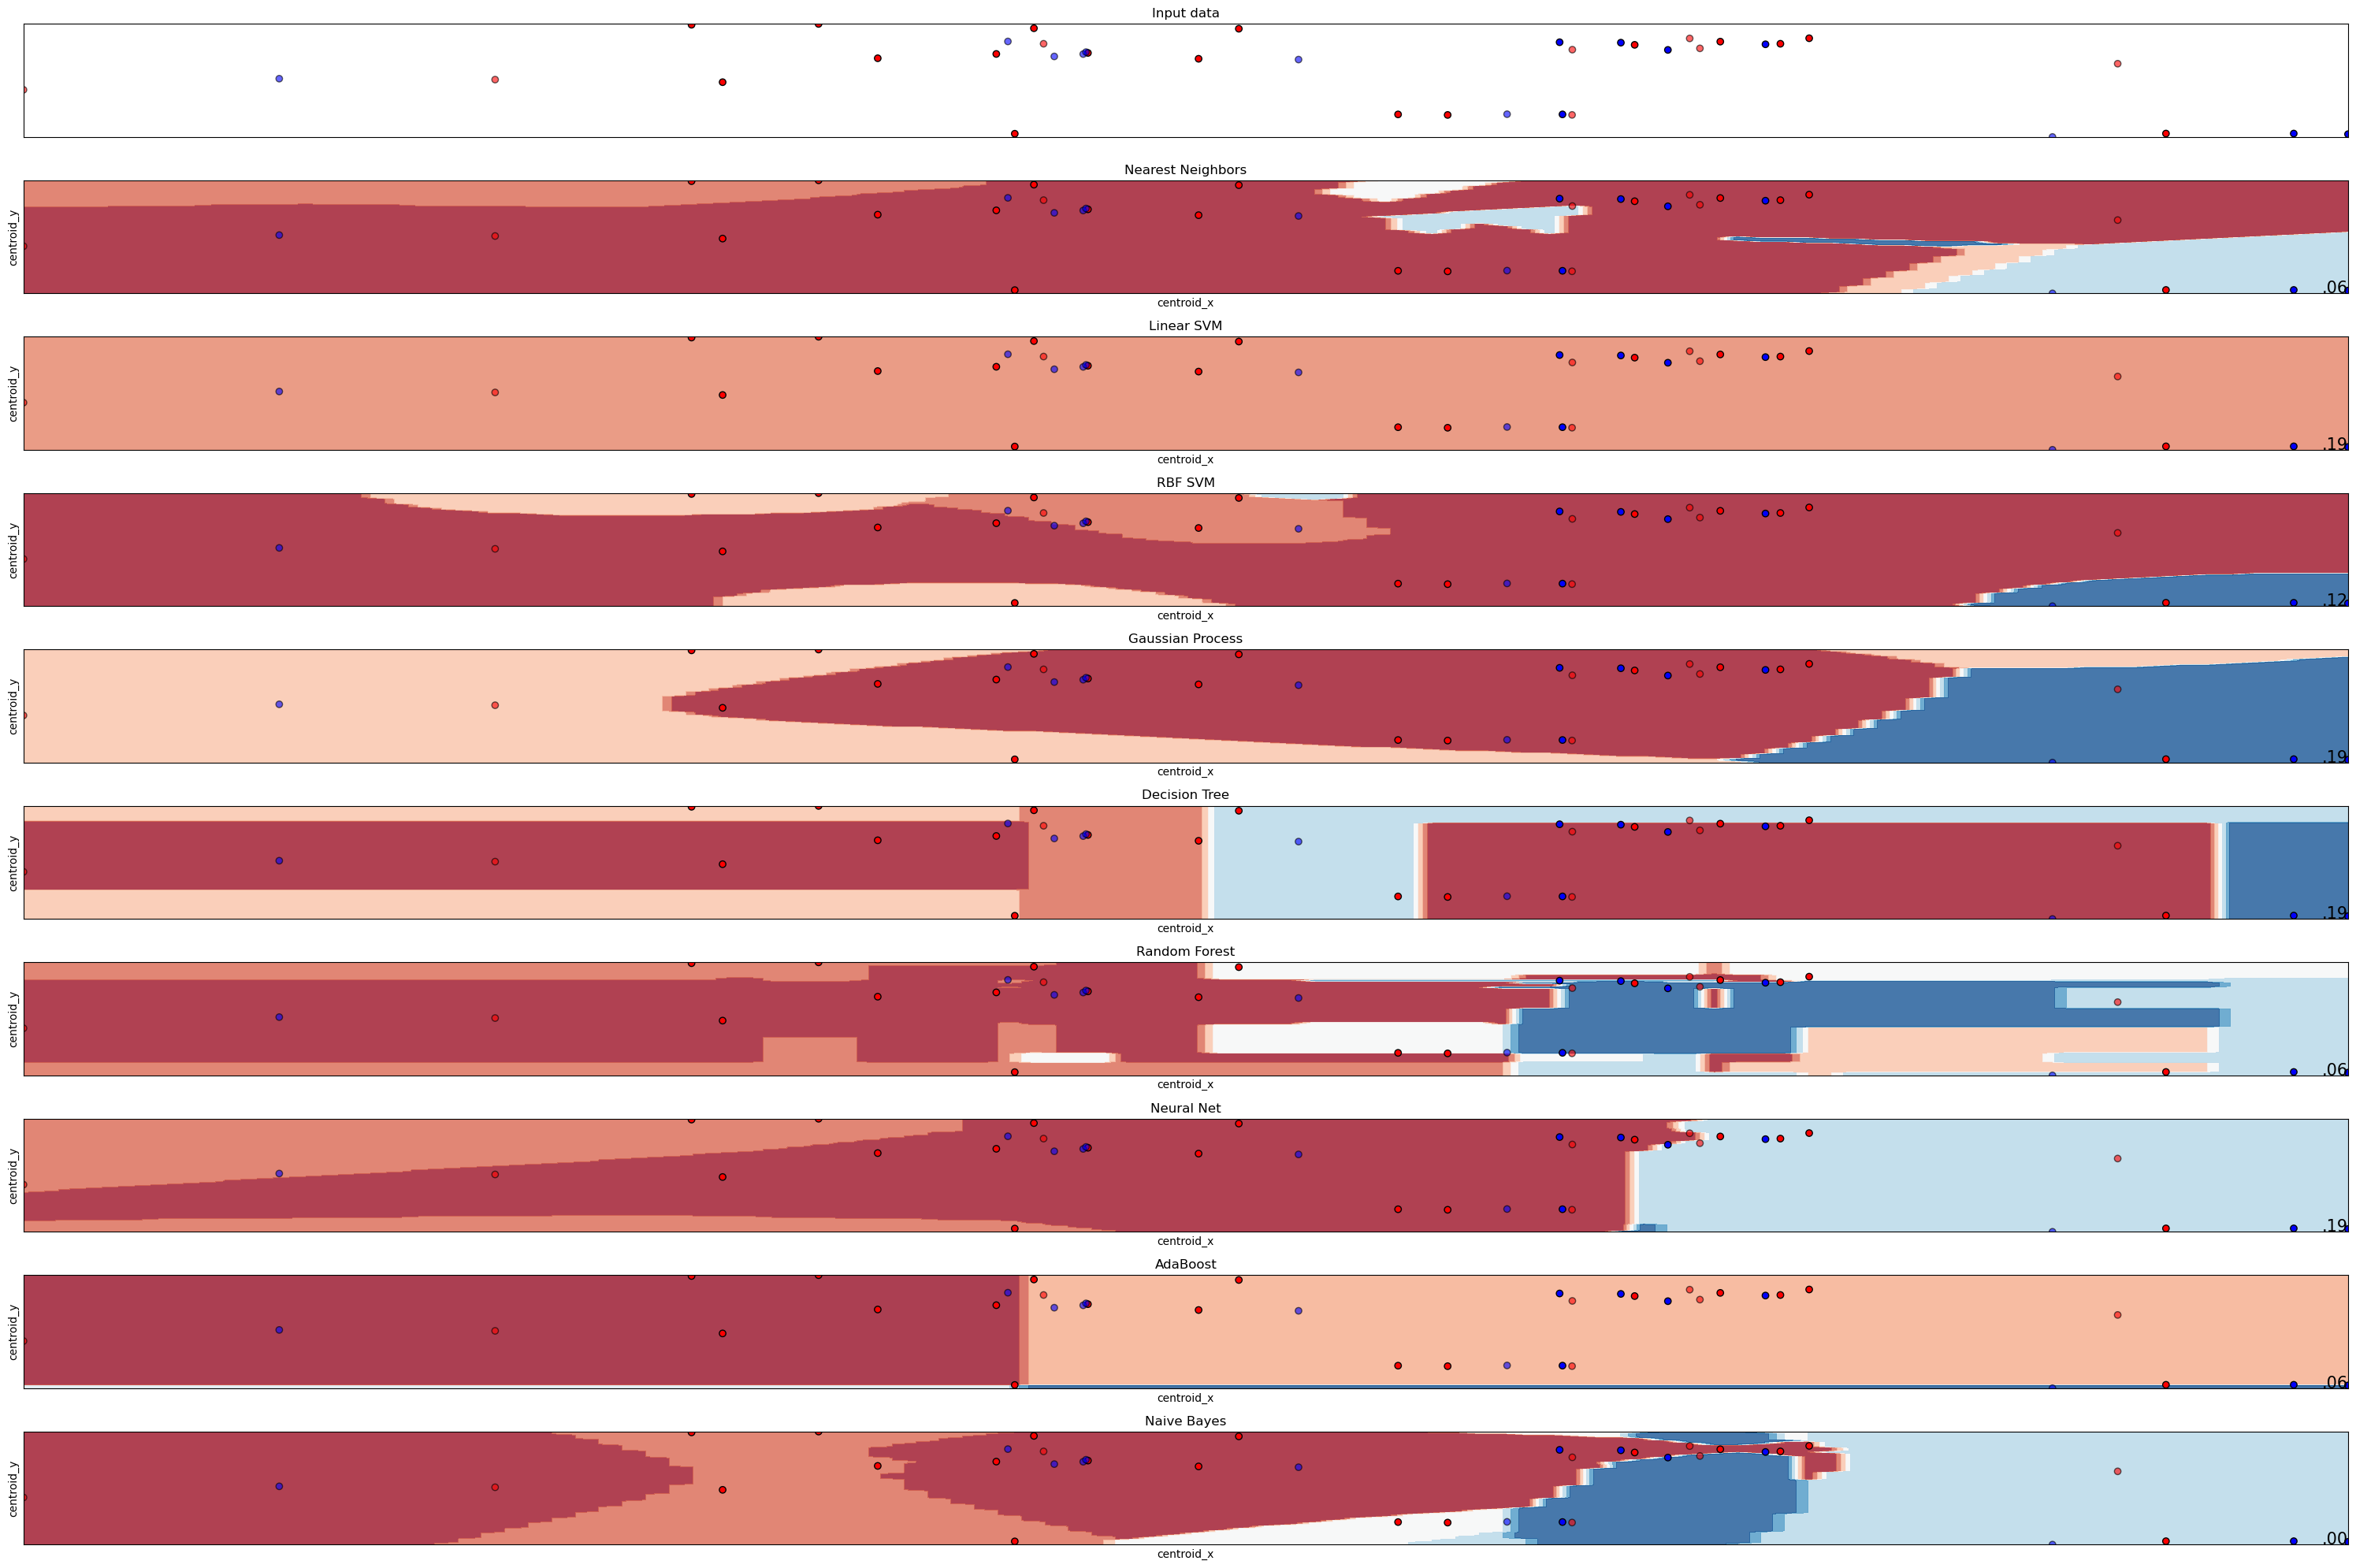

In [23]:
X_selected = X.iloc[:, [2, 3]] # Adjust indices as per your dataset structure

names = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
    "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
    "Naive Bayes"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB()
]

# Prepare dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

x_min, x_max = X_selected.iloc[:, 0].min() - 0.5, X_selected.iloc[:, 0].max() + 0.5
y_min, y_max = X_selected.iloc[:, 1].min() - 0.5, X_selected.iloc[:, 1].max() + 0.5

# Plotting
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
figure = plt.figure(figsize=(30, 20))
i = 1

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.4)

# Plot the dataset first
ax = plt.subplot(len(classifiers) + 1, 1, i)
ax.set_title("Input data")
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
i += 1

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(classifiers) + 1, 1, i)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary
    DecisionBoundaryDisplay.from_estimator(
        clf, X_selected, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(x_max - 0.3, y_min + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

#plt.savefig('Images/polygon_models.png', format='png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()